# 三角関数

## 三角比

直角三角形は、内角$\theta$の値を固定するとすべて相似な形となるため、$x/r$や$y/r$などの辺の長さ同士の比は一定になる。

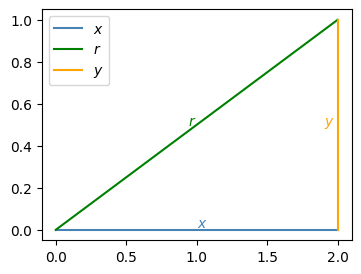

In [1]:
import numpy as np
import matplotlib.pyplot as plt

base = [0, 0]
x = [2, 0]
r = [2, 1]

fig, ax = plt.subplots(figsize=[4,3])
ax.plot([base[0], x[0]], [base[1], x[1]], label=r"$x$", color="steelblue")
ax.text(x=(x[0] - x[1])/2, y=x[1]+0.01, s=r"$x$", color="steelblue")

ax.plot([base[0], r[0]], [base[1], r[1]], label=r"$r$", color="green")
ax.text(x=1, y=0.5, s=r"$r$", color="green", ha="right")

ax.plot([x[0], r[0]], [x[1], r[1]], label=r"$y$", color="orange")
ax.text(x=x[0]-0.02, y=(r[1]-x[1])/2, s=r"$y$", color="orange", ha="right")

ax.legend()
fig.show()


この値を**三角比**と呼び、角度$\theta$の値によって決まるものとなる。

$$
\sin \theta = \frac{y}{r}\\
\cos \theta = \frac{x}{r}\\
\tan \theta = \frac{y}{x} = \frac{\sin \theta}{\cos \theta}
$$


## 三角関数

三角比の定義では、直角三角形の内角となりうる$0^\circ$から$90^\circ$の間の値しかとれないが、それ以外の値もとれるように定義を拡張したものが三角関数である。

単位円（半径$r=1$の円）上において、$\sin \theta = \frac{y}{1} = y, \cos \theta = \frac{x}{1} = x$となり扱いやすい。

これを利用して、半径1、中心が原点$O$の円（**単位円**）の円周上の点、$x$軸の正の向きからの角度が$\theta$の点の$y$座標を$\sin \theta$、$x$座標を$\cos \theta$と定義する。


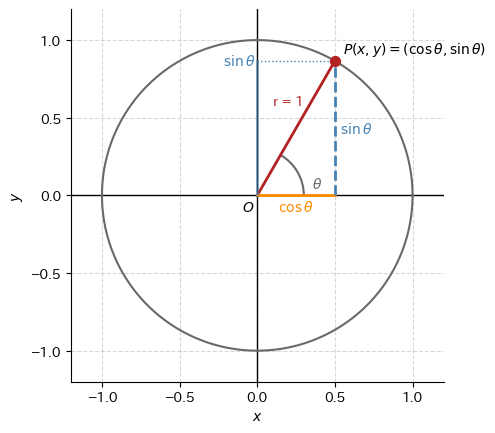

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Arc

# 図の準備
fig, ax = plt.subplots(figsize=(5, 5))

# グリッドと軸の設定
ax.grid(True, which='both', linestyle='--', alpha=0.5)
ax.axhline(y=0, color='black', linewidth=1)
ax.axvline(x=0, color='black', linewidth=1)
ax.set_aspect('equal') # アスペクト比を1:1にして円を正円に保つ

# 軸の範囲設定
limit = 1.2
ax.set_xlim(-limit, limit)
ax.set_ylim(-limit, limit)

# 1. 単位円の描画
theta_circle = np.linspace(0, 2*np.pi, 200)
x_circle = np.cos(theta_circle)
y_circle = np.sin(theta_circle)
ax.plot(x_circle, y_circle, color='dimgray', linewidth=1.5, label='単位円 (半径 r=1)')

# 2. 特定の角度を設定 (例: 60度 = pi/3)
angle_deg = 60
angle_rad = np.radians(angle_deg)

# 単位円上の点Pの座標 (cos(theta), sin(theta))
px = np.cos(angle_rad)
py = np.sin(angle_rad)

# 3. 原点から点Pへの動径 (半径) を描画
ax.plot([0, px], [0, py], color='firebrick', linewidth=2, label='動径 (半径)')
ax.scatter([px], [py], color='firebrick', s=50, zorder=5) # 点Pをプロット

# 4. sin(theta) と cos(theta) を表す補助線 (直角三角形の形成)
# cos(theta) の成分（X軸上の射影）
ax.plot([0, px], [0, 0], color='darkorange', linewidth=2, linestyle='-')
ax.plot([px, px], [0, py], color='steelblue', linewidth=2, linestyle='--') # 垂直線

# sin(theta) の成分（Y軸上の射影を示すため、Y軸にも線を引く）
ax.plot([0, 0], [0, py], color='steelblue', linewidth=2, linestyle='-', alpha=0.6)
ax.plot([0, px], [py, py], color='steelblue', linewidth=1, linestyle=':') # 水平補助線

# 5. ラベル付け
# 点Pのラベル
ax.text(px + 0.05, py + 0.05, r'$P(x, y) = (\cos\theta, \sin\theta)$', color='black')

# 原点O
ax.text(-0.1, -0.1, r'$O$')

# 半径 r=1
ax.text(px/2 - 0.15, py/2 + 0.15, 'r = 1', color='firebrick')

# cos(theta) のラベル (X軸上)
ax.text(px/2, -0.1, r'$\cos\theta$', color='darkorange', ha='center')

# sin(theta) のラベル (点Pからの垂線横とY軸上)
ax.text(px + 0.03, py/2, r'$\sin\theta$', color='steelblue', va='center')
ax.text(-0.22, py, r'$\sin\theta$', color='steelblue', va='center')

# 角度θの円弧を描画
arc_radius = 0.3
arc = Arc((0, 0), arc_radius*2, arc_radius*2, angle=0, theta1=0, theta2=angle_deg, color='dimgray', linewidth=1.5)
ax.add_patch(arc)
ax.text(arc_radius + 0.05, 0.05, r'$\theta$', color='dimgray')

# 軸ラベルとタイトル
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

# 軸を消す
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')

plt.tight_layout()
plt.show()

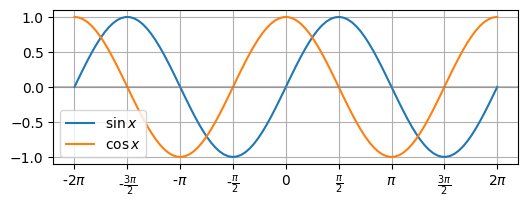

In [35]:
fig, ax = plt.subplots(figsize=[6,2])

width = 2 * np.pi
x = np.linspace(-width, width, 100)
ax.plot(x, np.sin(x), label=r"$\sin x$")
ax.plot(x, np.cos(x), label=r"$\cos x$")

ax.axhline(0, color="gray", alpha=0.5)

step_size = np.pi / 2
ticks = np.arange(-width, width + step_size, step_size)  # 0から2πまでπ/2刻み
tick_labels = [r"-2$\pi$", r"-$\frac{3\pi}{2}$", r"-$\pi$", r"-$\frac{\pi}{2}$", r"$0$", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$", r"$2\pi$"]
ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels)

ax.grid(True)
ax.legend()
fig.show()

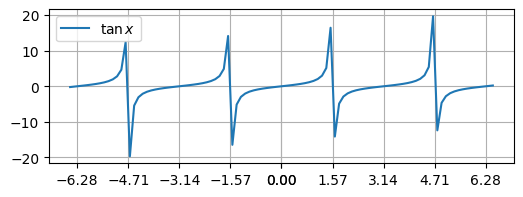

In [4]:
fig, ax = plt.subplots(figsize=[6,2])

r = np.array([0, 0.5, 1, 1.5, 2])
r = (-r).tolist() + r.tolist()
ticks = [c * np.pi for c in r]

x = np.linspace(-6.5, 6.5, 100)
ax.plot(x, np.tan(x), label=r"$\tan x$")
ax.set(xticks=ticks)
ax.grid(True)
ax.legend()
fig.show()

## 逆三角関数

三角関数の逆関数のことを逆三角関数という。

$$
\arcsin x = \sin^{-1} x\\
\arccos x = \cos^{-1} x\\
\arctan x = \tan^{-1} x\\
$$

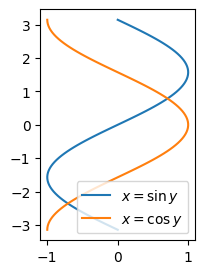

In [5]:
fig, ax = plt.subplots(figsize=[2,3])

x = np.linspace(-np.pi, np.pi, 100)
ax.plot(np.sin(x), x, label=r"$x = \sin y$")
ax.plot(np.cos(x), x, label=r"$x = \cos y$")
ax.legend()
fig.show()

#### 例：内積から角度を取り出す

$$
\cos \theta = \frac{\boldsymbol{a} \cdot \boldsymbol{b}}{\|\boldsymbol{a}\| \|\boldsymbol{b}\|}
$$

で、ここで$\theta$はラジアンであり、コサイン類似度$\cos \theta = 0$のときは$\theta = \arccos \theta= \frac{\pi}{2} \approx 1.571$

ラジアンを度（degree）に戻すには$degree = \theta \times (180 / \pi)$

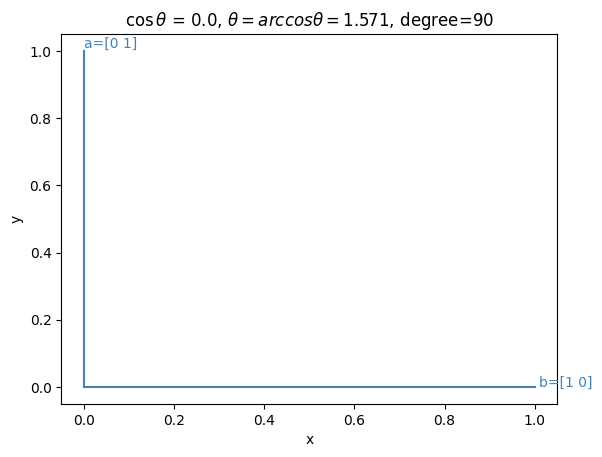

In [ ]:
a = np.array([0, 1])
b = np.array([1, 0])

fig, ax = plt.subplots()
ax.plot([0, a[0]], [0, a[1]], color="steelblue")
ax.plot([0, b[0]], [0, b[1]], color="steelblue")
ax.text(a[0] * 1.01, a[1] * 1.01, f"a={a}", color="steelblue")
ax.text(b[0] * 1.01, b[1] * 1.01, f"b={b}", color="steelblue")

cos_theta = (a @ b) / (np.linalg.norm(a) * np.linalg.norm(b))  # cos θ
theta = np.arccos(cos_theta)
degree = theta * (180 / np.pi)

ax.set(xlabel="x", ylabel="y", title=fr"$\cos \theta$ = {cos_theta:.1f}, $\theta= arccos \theta = ${theta:.3f}, degree={degree:.0f}")

fig.show()

:::{note}

内積やコサイン類似度との関係

2つのベクトル$a, b$のなす角度を$\theta$とすると、内積$\boldsymbol{a} \cdot \boldsymbol{b}$は

$$
\boldsymbol{a} \cdot \boldsymbol{b} = 
||\boldsymbol{a}|| \ ||\boldsymbol{b}|| \cos \theta
$$

と定義される。

単位円上の2つの矢印ならどちらもノルムは1なので内積が$\cos \theta$を表す。

:::

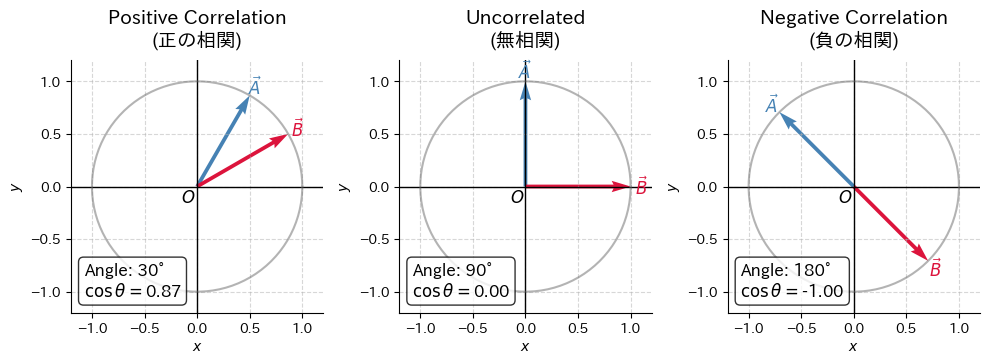

In [79]:
import matplotlib.pyplot as plt
import numpy as np

def draw_correlation_plot(ax, angle1_deg, angle2_deg, title):
    """
    指定されたAxesに2つのベクトルと単位円を描画する関数
    """
    # グリッドと軸の設定
    ax.grid(True, which='both', linestyle='--', alpha=0.5)
    ax.axhline(y=0, color='black', linewidth=1)
    ax.axvline(x=0, color='black', linewidth=1)
    ax.set_aspect('equal')
    
    # 軸の範囲設定
    limit = 1.2
    ax.set_xlim(-limit, limit)
    ax.set_ylim(-limit, limit)
    
    # 1. 単位円の描画
    theta_circle = np.linspace(0, 2*np.pi, 200)
    x_circle = np.cos(theta_circle)
    y_circle = np.sin(theta_circle)
    ax.plot(x_circle, y_circle, color='dimgray', linewidth=1.5, alpha=0.5)

    # 原点のラベル
    ax.text(-0.15, -0.15, r'$O$', fontsize=12)

    # --- ベクトル1 (青) ---
    rad1 = np.radians(angle1_deg)
    px1, py1 = np.cos(rad1), np.sin(rad1)
    ax.quiver(0, 0, px1, py1, angles='xy', scale_units='xy', scale=1, color='steelblue', width=0.015)
    ax.text(px1*1.1, py1*1.1, r'$\vec{A}$', color='steelblue', fontsize=12, ha='center', va='center')

    # --- ベクトル2 (赤) ---
    rad2 = np.radians(angle2_deg)
    px2, py2 = np.cos(rad2), np.sin(rad2)
    ax.quiver(0, 0, px2, py2, angles='xy', scale_units='xy', scale=1, color='crimson', width=0.015)
    ax.text(px2*1.1, py2*1.1, r'$\vec{B}$', color='crimson', fontsize=12, ha='center', va='center')

    # --- 内積 (コサイン類似度) の計算 ---
    # 単位ベクトル同士なので内積 = cos(theta)
    dot_product = np.dot([px1, py1], [px2, py2])
    
    # タイトルと計算結果の表示
    ax.set_title(title, fontsize=14, pad=10)
    
    # テキストボックスで値を表示
    text_str = f'Angle: {abs(angle1_deg - angle2_deg):.0f}°\n'
    text_str += r'$\cos\theta = $' + f'{dot_product:.2f}'
    
    props = dict(boxstyle='round', facecolor='white', alpha=0.8)
    ax.text(0.05, 0.05, text_str, transform=ax.transAxes, fontsize=12,
            verticalalignment='bottom', bbox=props)

    # 軸ラベル
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    
    # 不要な枠線を消す
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)


# --- メイン処理 ---

# 3つのサブプロットを作成 (1行3列)
fig, axes = plt.subplots(1, 3, figsize=(10, 4))

# 1. 正の相関 (角度が近い、例えば30度差)
# ベクトルA: 60度, ベクトルB: 30度
draw_correlation_plot(axes[0], 60, 30, "Positive Correlation\n(正の相関)")

# 2. 無相関 (直交、90度差)
# ベクトルA: 90度, ベクトルB: 0度
draw_correlation_plot(axes[1], 90, 0, "Uncorrelated\n(無相関)")

# 3. 負の相関 (反対方向、180度差に近い)
# ベクトルA: 135度, ベクトルB: -45度 (差は180度)
draw_correlation_plot(axes[2], 135, -45, "Negative Correlation\n(負の相関)")

plt.tight_layout()
plt.show()

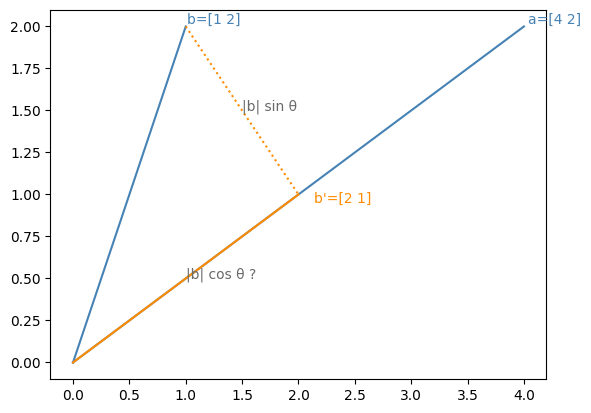

In [74]:
a = np.array([4, 2])
b = np.array([1, 2])

fig, ax = plt.subplots()
ax.plot([0, a[0]], [0, a[1]], color="steelblue")
ax.plot([0, b[0]], [0, b[1]], color="steelblue")
ax.text(a[0] * 1.01, a[1] * 1.01, f"a={a}", color="steelblue")
ax.text(b[0] * 1.01, b[1] * 1.01, f"b={b}", color="steelblue")

b_ = ((np.linalg.norm(b) / np.linalg.norm(a)) * a).astype(int)
ax.plot([0, b_[0]], [0, b_[1]], color="darkorange")
ax.plot([b[0], b_[0]], [b[1], b_[1]], color="darkorange", linestyle=":")
ax.text(1.5, 1.5, "|b| sin θ", color="dimgray")

ax.text(b_[0] * 1.07, b_[1] * 0.95, f"b'={b_}", color="darkorange")
ax.text(*(b_ * 0.5), "|b| cos θ ?", color="dimgray")


fig.show()

bからaへ垂線をたらして射影したものの長さは$||b|| \sin \theta$となる。これは単位円における$y = r \sin \theta$に相当する（ノルム$||b||$はベクトルの長さのため）

同様に$x = r \cos \theta$から$y = ||b|| \cos \theta$となる

はずだが…？

In [27]:
cos_theta = (a @ b) / (np.linalg.norm(a) * np.linalg.norm(b))  # cos θ
b_length = np.linalg.norm(b) * cos_theta # |b| cos θ
print(b_length, np.linalg.norm(b_)) ## 一致しない

1.7888543819998315 2.23606797749979


In [22]:
cos_theta = (a @ b) / (np.linalg.norm(a) * np.linalg.norm(b))  # cos θ
theta = np.arccos(cos_theta)
b_length = np.linalg.norm(b) * np.sin(theta) # |b| sin θ
print(b_length, np.linalg.norm(b - b_)) ## 一致しない

1.3416407864998743 1.4142135623730951


## 三角関数の基本的性質

:::{admonition} 性質1

$$
\begin{aligned}
& \sin (-x)=-\sin x\\
& \cos (-x)=\cos x \\
& \tan (-x)=-\tan x
\end{aligned}
$$
:::

一般に $f(-x)=-f(x)$ となる関数を **奇関数**、 $f(-x)=f(x)$ となる関数を **偶関数** という。 

$\sin x, \tan x$ は奇関数, $\cos x$ は偶関数である


:::{admonition} 性質2（相互関係）

$$
\sin ^2 x+\cos ^2 x=1
$$
:::

$$
\sin^2 \theta = \left(\frac{y}{r}\right)^2 = \frac{y^2}{r^2}
,\quad
\cos^2 \theta = \left(\frac{x}{r}\right)^2 = \frac{x^2}{r^2}
$$

$$
\sin^2 \theta + \cos^2 \theta
= \frac{y^2}{r^2} + \frac{x^2}{r^2} = \frac{x^2 + y^2}{r^2}
$$

三平方の定理より$x^2 + y^2 = r^2$なので

$$
\sin^2 \theta + \cos^2 \theta = \frac{x^2 + y^2}{r^2} = 1
$$

:::{admonition} 性質3 （加法定理）

$$
\begin{aligned}
& \sin (x \pm y)=\sin x \cos y \pm \cos x \sin y \\
& \cos (x \pm y)=\cos x \cos y \mp \sin x \sin y \\
& \tan (x \pm y)=\frac{\tan x \pm \tan y}{1 \mp \tan x \tan y}
\end{aligned}
$$
:::

:::{admonition} 性質4（2倍角の公式）

$$
\begin{aligned}
\sin 2 \theta & =2 \sin \theta \cos \theta \\
\cos 2 \theta & =1-2 \sin ^2 \theta \\
& =2 \cos ^2 \theta-1 \\
\tan 2 \theta & =\frac{2 \tan \theta}{1-\tan ^2 \theta}
\end{aligned}
$$
:::



:::{dropdown} 証明

$$
\begin{aligned}
\sin 2 \theta
&= \sin (\theta+\theta) \\
&= \sin \theta \cos \theta+\cos \theta \sin \theta \quad (\because \text { 加法定理 })\\
&= 2 \sin \theta \cos \theta
\end{aligned}
$$

$$
\begin{aligned}
\cos 2 \theta
&= \cos (\theta+\theta) \\
&= \cos \theta \cos \theta-\sin \theta \sin \theta \quad (\because \text { 加法定理 })\\
&= \cos ^2 \theta-\sin ^2 \theta \\
&= 2 \cos ^2 \theta-1  \quad (\because \text { 相互関係 }) \\
&= 1-2 \sin ^2 \theta \quad (\because \text { 相互関係 })
\end{aligned}
$$


$$
\begin{aligned}
\tan 2 \theta
&= \tan (\theta+\theta) \\
&= \frac{\tan \theta+\tan \theta}{1-\tan \theta \cdot \tan \theta} \quad (\because \text { 加法定理 })\\
&= \frac{2 \tan \theta}{1-\tan ^2 \theta}
\end{aligned}
$$


:::